<a href="https://colab.research.google.com/github/AnndyLibeMoore/Movie_Analisys/blob/main/Copia_de_Movie_analisys.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PROBLEMA DE NEGOCIO


Una plataforma de streaming para el hogar, con presencia en todo el mundo, necesita impulsar su rendimiento utilizando datos de tendencias en el sector de manera estratégica. Como científico de datos especializado en la industria del entretenimiento, has sido convocado para analizar estos datos y ofrecer insights que guíen sus decisiones y respondan a las siguientes preguntas clave:


## Preguntas
¿Cual es la evolución del rating por tipo de contenido?

¿Cual es el rating promedio por género?

¿Cuáles son los géneros que proporcionan mayor ROI?

¿Cuáles son los países con mayor producción de contenido?

¿Cual es tu recomendación para el cliente?

# 1.Configuracion del ambiente

In [1]:
import warnings
import numpy as np
import pandas as pd
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', '{:.2f}'.format)
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
import dask.dataframe as dd
from google.colab import drive
drive.mount('/content/drive')
global df_title_basics,df_title_ratings,df_tmdb

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# 2. Cargando bases

Para tener en cuenta
La carga de la base de datos la harémos con Dask ya que asi podremos tener un mejor manejo de las bases por su tamaño y luego convertiremos a dtaframe

la r' al inicio define que la siguiente ruta es una cadena cruda, e python es normal encontrarse con caracteres como \n que significa salto de linea, lon que hace r' es decile a python q en la siguiente ruta encontrara esos tipos de texto pero q en este caso no son caracteres sino q es parte de la ruta, parte del texto asi q no lo leera como un salto de linea sino q permitira leer la ruta correctamente.

De igual forma '\t' el delimitador permite q se lea el archivo correctamente

In [2]:
df_title_basics_original = dd.read_csv(r'/content/drive/MyDrive/title.basics.tsv.zip', dtype={'isAdult': 'object', 'runtimeMinutes': 'object', 'startYear': 'object'}, blocksize=None, delimiter='\t', low_memory=False)
df_title_basics_original.head(10)

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,tt0000001,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short"
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,\N,5,"Animation,Short"
2,tt0000003,short,Pauvre Pierrot,Pauvre Pierrot,0,1892,\N,5,"Animation,Comedy,Romance"
3,tt0000004,short,Un bon bock,Un bon bock,0,1892,\N,12,"Animation,Short"
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0,1893,\N,1,"Comedy,Short"
5,tt0000006,short,Chinese Opium Den,Chinese Opium Den,0,1894,\N,1,Short
6,tt0000007,short,Corbett and Courtney Before the Kinetograph,Corbett and Courtney Before the Kinetograph,0,1894,\N,1,"Short,Sport"
7,tt0000008,short,Edison Kinetoscopic Record of a Sneeze,Edison Kinetoscopic Record of a Sneeze,0,1894,\N,1,"Documentary,Short"
8,tt0000009,movie,Miss Jerry,Miss Jerry,0,1894,\N,45,Romance
9,tt0000010,short,Leaving the Factory,La sortie de l'usine Lumière à Lyon,0,1895,\N,1,"Documentary,Short"


In [3]:
type(df_title_basics_original)

dask.dataframe.core.DataFrame

In [4]:
#convertimos el Dask a un DataFrame
df_title_basics_original = df_title_basics_original[['tconst',	'titleType',	'primaryTitle',	'originalTitle',	'isAdult',	'startYear', 'runtimeMinutes', 'genres']].compute()


In [5]:
df_title_basics_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10843834 entries, 0 to 10843833
Data columns (total 8 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   tconst          string
 1   titleType       string
 2   primaryTitle    string
 3   originalTitle   string
 4   isAdult         string
 5   startYear       string
 6   runtimeMinutes  string
 7   genres          string
dtypes: string(8)
memory usage: 1.1 GB


In [6]:
df_title_ratings_original = dd.read_csv(r'/content/drive/MyDrive/title.ratings.tsv.zip', blocksize=None, delimiter='\t', low_memory=False)
df_title_ratings_original.head(10)

,tconst,averageRating,numVotes
0,tt0000001,5.70,2059
1,tt0000002,5.60,277
2,tt0000003,6.50,2023
3,tt0000004,5.30,180
4,tt0000005,6.20,2787
5,tt0000006,5.10,187
6,tt0000007,5.40,872
7,tt0000008,5.40,2202
8,tt0000009,5.40,212
9,tt0000010,6.80,7594


In [7]:
#convertimos a df
df_title_ratings_original = df_title_ratings_original.compute()

In [8]:
df_title_ratings_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1446041 entries, 0 to 1446040
Data columns (total 3 columns):
 #   Column         Non-Null Count    Dtype  
---  ------         --------------    -----  
 0   tconst         1446041 non-null  string 
 1   averageRating  1446041 non-null  float64
 2   numVotes       1446041 non-null  int64  
dtypes: float64(1), int64(1), string(1)
memory usage: 40.3 MB


In [9]:
df_title_ratings_original[df_title_ratings_original.tconst == "tt10872600"]

,tconst,averageRating,numVotes
510389,tt10872600,8.20,886954


In [10]:
df_title_basics_original[df_title_basics_original.tconst == "tt10872600"]

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,runtimeMinutes,genres
1451674,tt10872600,movie,Spider-Man: No Way Home,Spider-Man: No Way Home,0,2021,148,"Action,Adventure,Fantasy"


In [11]:
df_tmdb_original = dd.read_csv(r'/content/drive/MyDrive/TMDB_movie_dataset_v11.csv.zip', blocksize=None, low_memory=False)
df_tmdb_original.head()

,id,title,vote_average,vote_count,status,release_date,revenue,runtime,adult,backdrop_path,budget,homepage,imdb_id,original_language,original_title,overview,popularity,poster_path,tagline,genres,production_companies,production_countries,spoken_languages,keywords
0,27205,Inception,8.36,34495,Released,2010-07-15,825532764,148,False,/8ZTVqvKDQ8emSGUEMjsS4yHAwrp.jpg,160000000,https://www.warnerbros.com/movies/inception,tt1375666,en,Inception,"Cobb, a skilled thief who commits corporate es...",83.95,/oYuLEt3zVCKq57qu2F8dT7NIa6f.jpg,Your mind is the scene of the crime.,"Action, Science Fiction, Adventure","Legendary Pictures, Syncopy, Warner Bros. Pict...","United Kingdom, United States of America","English, French, Japanese, Swahili","rescue, mission, dream, airplane, paris, franc..."
1,157336,Interstellar,8.42,32571,Released,2014-11-05,701729206,169,False,/pbrkL804c8yAv3zBZR4QPEafpAR.jpg,165000000,http://www.interstellarmovie.net/,tt0816692,en,Interstellar,The adventures of a group of explorers who mak...,140.24,/gEU2QniE6E77NI6lCU6MxlNBvIx.jpg,Mankind was born on Earth. It was never meant ...,"Adventure, Drama, Science Fiction","Legendary Pictures, Syncopy, Lynda Obst Produc...","United Kingdom, United States of America",English,"rescue, future, spacecraft, race against time,..."
2,155,The Dark Knight,8.51,30619,Released,2008-07-16,1004558444,152,False,/nMKdUUepR0i5zn0y1T4CsSB5chy.jpg,185000000,https://www.warnerbros.com/movies/dark-knight/,tt0468569,en,The Dark Knight,Batman raises the stakes in his war on crime. ...,130.64,/qJ2tW6WMUDux911r6m7haRef0WH.jpg,Welcome to a world without rules.,"Drama, Action, Crime, Thriller","DC Comics, Legendary Pictures, Syncopy, Isobel...","United Kingdom, United States of America","English, Mandarin","joker, sadism, chaos, secret identity, crime f..."
3,19995,Avatar,7.57,29815,Released,2009-12-15,2923706026,162,False,/vL5LR6WdxWPjLPFRLe133jXWsh5.jpg,237000000,https://www.avatar.com/movies/avatar,tt0499549,en,Avatar,"In the 22nd century, a paraplegic Marine is di...",79.93,/kyeqWdyUXW608qlYkRqosgbbJyK.jpg,Enter the world of Pandora.,"Action, Adventure, Fantasy, Science Fiction","Dune Entertainment, Lightstorm Entertainment, ...","United States of America, United Kingdom","English, Spanish","future, society, culture clash, space travel, ..."
4,24428,The Avengers,7.71,29166,Released,2012-04-25,1518815515,143,False,/9BBTo63ANSmhC4e6r62OJFuK2GL.jpg,220000000,https://www.marvel.com/movies/the-avengers,tt0848228,en,The Avengers,When an unexpected enemy emerges and threatens...,98.08,/RYMX2wcKCBAr24UyPD7xwmjaTn.jpg,Some assembly required.,"Science Fiction, Action, Adventure",Marvel Studios,United States of America,"English, Hindi, Russian","new york city, superhero, shield, based on com..."


In [12]:
df_tmdb_original = df_tmdb_original[['imdb_id','release_date','budget','revenue','genres','production_countries','vote_average']].compute()

In [13]:
#bein en la celda anteriro convertimos el dask a un df pero
#tambien aprovehcmoas para quedarnos solo con algunas columnas
df_tmdb_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1051223 entries, 0 to 1051222
Data columns (total 7 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   imdb_id               583746 non-null   string 
 1   release_date          911420 non-null   string 
 2   budget                1051223 non-null  int64  
 3   revenue               1051223 non-null  int64  
 4   genres                651292 non-null   string 
 5   production_countries  609624 non-null   string 
 6   vote_average          1051223 non-null  float64
dtypes: float64(1), int64(2), string(4)
memory usage: 69.7 MB


In [14]:
df_tmdb_original[df_tmdb_original.imdb_id == "tt10872600"]

,imdb_id,release_date,budget,revenue,genres,production_countries,vote_average
57,tt10872600,2021-12-15,200000000,1921847111,"Action, Adventure, Science Fiction",United States of America,7.99


# 3.Tratamiento de Datos

In [15]:
df_title_basics = df_title_basics_original.copy()
df_title_ratings = df_title_ratings_original.copy()
df_tmdb = df_tmdb_original.copy()

In [16]:
#hacemos un value_counts para ver la cantidad de registros a los q
#pertenece cada valor de la columna titletype

df_title_basics.titleType.value_counts(normalize=True)

titleType
tvEpisode      0.77
short          0.09
movie          0.06
video          0.03
tvSeries       0.02
tvMovie        0.01
tvMiniSeries   0.01
tvSpecial      0.00
videoGame      0.00
tvShort        0.00
tvPilot        0.00
Name: proportion, dtype: double[pyarrow]

In [17]:
#vemos que el 6% es de movie, y 2% es de tvSeries, los demas no nos interesan
#asi que filtraremos para quedarnos solo con esos registros,
#tambien verificaremos los valores de la columna
#startYear  para solo tomar los registros del 1990 - 2023

In [18]:
# Contar los registros específicos de 'tvseries' y 'movie'
counts_tv_movie = df_title_basics[df_title_basics['titleType'].isin(['tvSeries', 'movie'])]['titleType'].value_counts()
counts_tv_movie

titleType
movie       683312
tvSeries    265035
Name: count, dtype: int64[pyarrow]

In [19]:
#def preprocesamiento():
 # global df_title_basics,df_title_ratings,df_tmdb

#filtramos el db solo por registros movie y tvSerie
df_title_basics = df_title_basics[df_title_basics['titleType'].isin(['tvSeries', 'movie'])]



df_title_basics.head()


,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,runtimeMinutes,genres
8,tt0000009,movie,Miss Jerry,Miss Jerry,0,1894,45,Romance
144,tt0000147,movie,The Corbett-Fitzsimmons Fight,The Corbett-Fitzsimmons Fight,0,1897,100,"Documentary,News,Sport"
498,tt0000502,movie,Bohemios,Bohemios,0,1905,100,\N
570,tt0000574,movie,The Story of the Kelly Gang,The Story of the Kelly Gang,0,1906,70,"Action,Adventure,Biography"
587,tt0000591,movie,The Prodigal Son,L'enfant prodigue,0,1907,90,Drama


In [20]:
#verificamos q la columna titleType tenga solo 2 tipos de valores
df_title_basics['titleType'].unique()

<ArrowStringArray>
['movie', 'tvSeries']
Length: 2, dtype: string

In [21]:
#verifico los valores unicos de startYear
df_title_basics['startYear'].unique()

<ArrowStringArray>
['1894', '1897', '1905', '1906', '1907', '1908', '1909', '1910', '1912',
 '1911',
 ...
 '1900', '2016', '2025', '2026', '2027', '2028', '1896', '2029', '2030',
 '2031']
Length: 138, dtype: string

In [22]:
#verificamos con una query qué información obtenemos
#de un registro del 2030

df_title_basics.query('startYear == "2030"')

#como veremos en las siguientes celdas no tiene datos que nos aporten valor
#bien, despues de revisar diferentes valores que la columna startYear
#tiene con algunos años proximos, vemos que hay registros
#de peliculas que aun no se han estrenado asi q no le
#aportan valor a nuestro analisis, entonces haremos una
#clasificacion para q nuetro analisis sea del 1990-2023

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,runtimeMinutes,genres
8612938,tt4985164,movie,Hurry Scurry,Hurry Scurry,0,2030,\N,\N


In [23]:
df_tmdb[df_tmdb.imdb_id == "tt4985164"]

,imdb_id,release_date,budget,revenue,genres,production_countries,vote_average


In [24]:
df_title_ratings[df_title_ratings.tconst == "tt4985164"]

,tconst,averageRating,numVotes


In [25]:
#filtramos por los años que nos interesan
df_title_basics = df_title_basics.query('startYear >= "1990" & startYear <= "2023"')
df_title_basics.head()

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,runtimeMinutes,genres
11634,tt0011801,movie,Tötet nicht mehr,Tötet nicht mehr,0,2019,\N,"Action,Crime"
13079,tt0013274,movie,Istoriya grazhdanskoy voyny,Istoriya grazhdanskoy voyny,0,2021,94,Documentary
15174,tt0015414,movie,La tierra de los toros,La tierra de los toros,0,2000,60,\N
15482,tt0015724,movie,Dama de noche,Dama de noche,0,1993,102,"Drama,Mystery,Romance"
34797,tt0035423,movie,Kate & Leopold,Kate & Leopold,0,2001,118,"Comedy,Fantasy,Romance"


In [26]:
df_title_basics.info()

<class 'pandas.core.frame.DataFrame'>
Index: 572385 entries, 11634 to 10843784
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   tconst          572385 non-null  string
 1   titleType       572385 non-null  string
 2   primaryTitle    572383 non-null  string
 3   originalTitle   572383 non-null  string
 4   isAdult         572385 non-null  string
 5   startYear       572385 non-null  string
 6   runtimeMinutes  572385 non-null  string
 7   genres          572385 non-null  string
dtypes: string(8)
memory usage: 60.2 MB


In [27]:
#filtramos el df_tmdb con valores mayores a 0 en las
#columnas que nos interesan
df_tmdb = df_tmdb[(df_tmdb['budget'] > 0) & (df_tmdb['revenue'] > 0)]
df_tmdb.head()

#creamos la columna roi
df_tmdb['roi'] = (df_tmdb['revenue'] - df_tmdb['budget']) / df_tmdb['budget']
df_tmdb.head()


<ipython-input-27-e8ff91bfee13>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tmdb['roi'] = (df_tmdb['revenue'] - df_tmdb['budget']) / df_tmdb['budget']


,imdb_id,release_date,budget,revenue,genres,production_countries,vote_average,roi
0,tt1375666,2010-07-15,160000000,825532764,"Action, Science Fiction, Adventure","United Kingdom, United States of America",8.36,4.16
1,tt0816692,2014-11-05,165000000,701729206,"Adventure, Drama, Science Fiction","United Kingdom, United States of America",8.42,3.25
2,tt0468569,2008-07-16,185000000,1004558444,"Drama, Action, Crime, Thriller","United Kingdom, United States of America",8.51,4.43
3,tt0499549,2009-12-15,237000000,2923706026,"Action, Adventure, Fantasy, Science Fiction","United States of America, United Kingdom",7.57,11.34
4,tt0848228,2012-04-25,220000000,1518815515,"Science Fiction, Action, Adventure",United States of America,7.71,5.90


<Axes: >

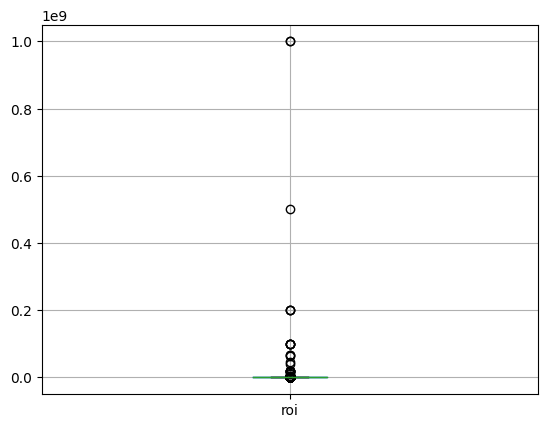

In [28]:
df_tmdb.boxplot(['roi'])

In [29]:
df_tmdb[df_tmdb['roi'] >= 200000000]

,imdb_id,release_date,budget,revenue,genres,production_countries,vote_average,roi
246848,<NA>,<NA>,2,999999999,"Action, Thriller, Mystery, Crime",<NA>,10.00,499999998.50
566222,tt27673298,2023-05-17,1,1000000000,Drama,<NA>,0.00,999999999.00
645103,<NA>,<NA>,1,1000000000,<NA>,<NA>,0.00,999999999.00


In [30]:
df_title_ratings[df_title_ratings.tconst == "tt10872600"]

,tconst,averageRating,numVotes
510389,tt10872600,8.20,886954


In [31]:
df_title_basics[df_title_basics.tconst == "tt10872600"]

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,runtimeMinutes,genres
1451674,tt10872600,movie,Spider-Man: No Way Home,Spider-Man: No Way Home,0,2021,148,"Action,Adventure,Fantasy"


In [32]:
df_tmdb.head()

,imdb_id,release_date,budget,revenue,genres,production_countries,vote_average,roi
0,tt1375666,2010-07-15,160000000,825532764,"Action, Science Fiction, Adventure","United Kingdom, United States of America",8.36,4.16
1,tt0816692,2014-11-05,165000000,701729206,"Adventure, Drama, Science Fiction","United Kingdom, United States of America",8.42,3.25
2,tt0468569,2008-07-16,185000000,1004558444,"Drama, Action, Crime, Thriller","United Kingdom, United States of America",8.51,4.43
3,tt0499549,2009-12-15,237000000,2923706026,"Action, Adventure, Fantasy, Science Fiction","United States of America, United Kingdom",7.57,11.34
4,tt0848228,2012-04-25,220000000,1518815515,"Science Fiction, Action, Adventure",United States of America,7.71,5.90


<Axes: >

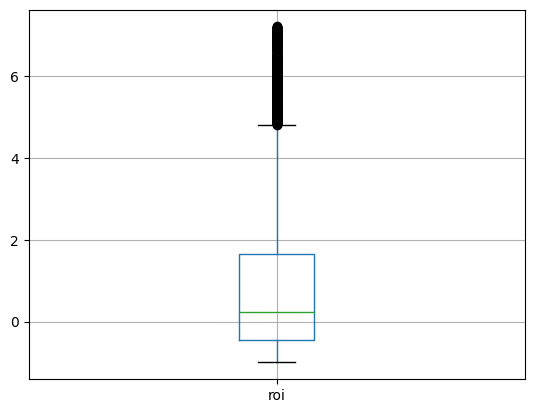

In [33]:
#tratamos los outliers
valor_roi= df_tmdb['roi']

#creamos los quartiles
Q1 = valor_roi.quantile(.25)
Q3 = valor_roi.quantile(.75)
IIQ = Q3 - Q1
limite_inferior = Q1 - 1.5 * IIQ
limite_superior = Q3 + 1.5 * IIQ

#criterio de seleccion para los valores
seleccion = ((valor_roi >= limite_inferior) & (valor_roi <= limite_superior))

df_tmdb = df_tmdb[seleccion]

#verificamos el boxplot
df_tmdb.boxplot(['roi'])

In [34]:
df_tmdb.roi.value_counts()

roi
0.00     1081
1.00      245
1.50       91
4.00       79
0.50       79
-0.50      74
0.20       69
-0.80      63
2.00       59
-0.90      55
0.67       51
0.33       51
3.00       46
2.33       45
-0.95      37
-0.75      37
-0.01      33
0.91       33
0.25       33
5.00       28
-0.67      26
-0.99      25
0.82       25
-0.90      24
-0.60      23
-0.33      21
-0.99      21
0.10       19
7.00       16
-0.20      16
-0.40      15
6.00       15
-0.70      15
0.40       15
-0.93      14
5.67       14
-0.98      14
-0.83      13
0.60       13
-0.10      13
1.33       12
-0.85      12
0.75       12
1.67       12
-1.00      11
-0.17      11
-0.92      11
-0.25      10
-0.85      10
-0.96      10
-0.97      10
0.80        9
-0.87       9
-0.34       9
1.40        9
6.50        8
3.67        8
0.43        8
-0.97       8
-0.86       7
-0.43       7
1.80        7
2.50        7
0.08        7
1.86        7
1.20        7
-0.92       7
-0.94       6
3.50        6
0.62        6
4.50        6
0.

In [35]:
df_title_basics.info()

<class 'pandas.core.frame.DataFrame'>
Index: 572385 entries, 11634 to 10843784
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   tconst          572385 non-null  string
 1   titleType       572385 non-null  string
 2   primaryTitle    572383 non-null  string
 3   originalTitle   572383 non-null  string
 4   isAdult         572385 non-null  string
 5   startYear       572385 non-null  string
 6   runtimeMinutes  572385 non-null  string
 7   genres          572385 non-null  string
dtypes: string(8)
memory usage: 60.2 MB


In [36]:
#elimino nan
df_title_basics = df_title_basics.dropna()
df_title_ratings = df_title_ratings.dropna()
df_tmdb = df_tmdb.dropna()

In [37]:
df_title_basics.info()
print('-------------------------')
df_title_ratings.info()
print('-------------------------')
df_tmdb.info()

<class 'pandas.core.frame.DataFrame'>
Index: 572383 entries, 11634 to 10843784
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   tconst          572383 non-null  string
 1   titleType       572383 non-null  string
 2   primaryTitle    572383 non-null  string
 3   originalTitle   572383 non-null  string
 4   isAdult         572383 non-null  string
 5   startYear       572383 non-null  string
 6   runtimeMinutes  572383 non-null  string
 7   genres          572383 non-null  string
dtypes: string(8)
memory usage: 60.2 MB
-------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1446041 entries, 0 to 1446040
Data columns (total 3 columns):
 #   Column         Non-Null Count    Dtype  
---  ------         --------------    -----  
 0   tconst         1446041 non-null  string 
 1   averageRating  1446041 non-null  float64
 2   numVotes       1446041 non-null  int64  
dtypes: float64(1), int64(1), s

In [38]:
#reemplazo los valors\N
df_title_basics = df_title_basics.replace(r'\N', np.nan)
df_title_basics = df_title_basics.replace(r'\\N', np.nan)

df_title_ratings = df_title_ratings.replace(r'\N', np.nan)
df_title_ratings = df_title_ratings.replace(r'\\N', np.nan)

df_tmdb = df_tmdb.replace(r'\N', np.nan)
df_tmdb = df_tmdb.replace(r'\\N', np.nan)


In [39]:
df_title_basics.info()
print('-------------------------')
df_title_ratings.info()
print('-------------------------')
df_tmdb.info()

<class 'pandas.core.frame.DataFrame'>
Index: 572383 entries, 11634 to 10843784
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   tconst          572383 non-null  string
 1   titleType       572383 non-null  string
 2   primaryTitle    572383 non-null  string
 3   originalTitle   572383 non-null  string
 4   isAdult         572383 non-null  string
 5   startYear       572383 non-null  string
 6   runtimeMinutes  361381 non-null  string
 7   genres          533750 non-null  string
dtypes: string(8)
memory usage: 59.7 MB
-------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1446041 entries, 0 to 1446040
Data columns (total 3 columns):
 #   Column         Non-Null Count    Dtype  
---  ------         --------------    -----  
 0   tconst         1446041 non-null  string 
 1   averageRating  1446041 non-null  float64
 2   numVotes       1446041 non-null  int64  
dtypes: float64(1), int64(1), s

In [40]:
#elimino duplicados
df_title_basics.drop_duplicates(subset='tconst', keep='first', inplace=True)
df_title_ratings.drop_duplicates(subset='tconst', keep='first', inplace=True)
df_tmdb.drop_duplicates(inplace=True)

In [41]:
df_title_basics.info()
print('-------------------------')
df_title_ratings.info()
print('-------------------------')
df_tmdb.info()

<class 'pandas.core.frame.DataFrame'>
Index: 572383 entries, 11634 to 10843784
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   tconst          572383 non-null  string
 1   titleType       572383 non-null  string
 2   primaryTitle    572383 non-null  string
 3   originalTitle   572383 non-null  string
 4   isAdult         572383 non-null  string
 5   startYear       572383 non-null  string
 6   runtimeMinutes  361381 non-null  string
 7   genres          533750 non-null  string
dtypes: string(8)
memory usage: 59.7 MB
-------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1446041 entries, 0 to 1446040
Data columns (total 3 columns):
 #   Column         Non-Null Count    Dtype  
---  ------         --------------    -----  
 0   tconst         1446041 non-null  string 
 1   averageRating  1446041 non-null  float64
 2   numVotes       1446041 non-null  int64  
dtypes: float64(1), int64(1), s

In [42]:
#convierto cualquier valor no numerico a nan
df_title_basics['runtimeMinutes'] = pd.to_numeric(df_title_basics['runtimeMinutes'], errors='coerce')

In [43]:
#verifico si la columna tien nulos
print(df_title_basics['runtimeMinutes'].isnull().any())
#verifico cuántos nulos tiene
print(df_title_basics['runtimeMinutes'].isnull().sum())


True
211002


In [44]:
#visualizaremos esos regitros nulos para definir cómo tratarlos
nulos_runtimeMinutes = df_title_basics[df_title_basics['runtimeMinutes'].isnull()]

# Muestra los registros
nulos_runtimeMinutes.head(20)

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,runtimeMinutes,genres
11634,tt0011801,movie,Tötet nicht mehr,Tötet nicht mehr,0,2019,<NA>,"Action,Crime"
37412,tt0038086,movie,Shiva und die Galgenblume,Shiva und die Galgenblume,0,1993,<NA>,Thriller
79679,tt0081436,movie,Rosa Heimat - eine Landillusion,Rosa Heimat - eine Landillusion,0,1990,<NA>,<NA>
82012,tt0083837,movie,The Dirty Area,The Dirty Area,0,1992,<NA>,<NA>
88012,tt0090000,movie,Wet Sexes in the Sun,Sexos húmedos al sol,1,1995,<NA>,Adult
90285,tt0092330,tvSeries,Casino Royal,Casino Royal,0,1990,<NA>,Comedy
90396,tt0092443,tvSeries,Runaway with the Rich and Famous,Runaway with the Rich and Famous,0,1991,<NA>,Family
91018,tt0093081,movie,Geld,Geld,0,1990,<NA>,<NA>
91909,tt0094004,movie,Soldier of Fortune,Soldier of Fortune,0,1990,<NA>,"Action,Thriller,War"
93087,tt0095201,movie,Gaspard et fil$,Gaspard et fil$,0,1990,<NA>,Comedy


In [45]:
df_title_basics.info()

<class 'pandas.core.frame.DataFrame'>
Index: 572383 entries, 11634 to 10843784
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   tconst          572383 non-null  string
 1   titleType       572383 non-null  string
 2   primaryTitle    572383 non-null  string
 3   originalTitle   572383 non-null  string
 4   isAdult         572383 non-null  string
 5   startYear       572383 non-null  string
 6   runtimeMinutes  361381 non-null  Int64 
 7   genres          533750 non-null  string
dtypes: Int64(1), string(7)
memory usage: 61.6 MB


In [46]:
'''Bien, el df_title_basics de momento cuenta con 572383 registros
y runtime ya tiene 211002 asi que para no perder tantos regitros
lo que haremos es generar esos datos y lo haremos con
el metodo fillna mean tomando en cuenta que la gran mayoria de
datos son peliculas y generalmente duran lo mismo
'''

'Bien, el df_title_basics de momento cuenta con 572383 registros\ny runtime ya tiene 211002 asi que para no perder tantos regitros\nlo que haremos es generar esos datos y lo haremos con\nel metodo fillna mean tomando en cuenta que la gran mayoria de\ndatos son peliculas y generalmente duran lo mismo\n'

In [47]:
#aplicamos el metodo ya que el metodo aplica valores float
#cambiaremos el tipo de dato


df_title_basics['runtimeMinutes'] = df_title_basics['runtimeMinutes'].astype('float64')
#aplicamos el metodo
df_title_basics['runtimeMinutes'] = df_title_basics['runtimeMinutes'].fillna(df_title_basics['runtimeMinutes'].mean())


In [48]:
#verifico si la columna tiene nulos
print(df_title_basics['runtimeMinutes'].isnull().any())
#verifico cuántos nulos tiene
print(df_title_basics['runtimeMinutes'].isnull().sum())

False
0


In [49]:
df_tmdb.release_date.value_counts()

release_date
2011-09-09    9
2009-10-16    8
2010-02-26    8
2016-10-07    7
2014-10-17    7
2008-12-25    7
2015-10-16    7
2017-09-01    7
2017-06-16    7
2014-12-25    7
2017-10-12    7
2011-09-30    7
1995-12-22    7
2010-10-01    6
2015-09-17    6
2009-02-05    6
2017-03-23    6
2018-02-16    6
2006-03-17    6
2004-12-17    6
2012-09-07    6
2002-12-06    6
2008-10-24    6
2007-09-07    6
2015-12-03    6
2008-08-15    6
2007-09-06    6
2007-09-14    6
2010-09-16    6
2019-11-07    6
2019-10-10    6
2017-09-22    6
1998-10-16    6
2007-08-24    6
2006-04-28    6
2004-11-12    6
2005-09-30    6
1999-10-22    6
2016-09-09    6
2017-10-27    5
2000-10-06    5
1999-04-16    5
2009-06-19    5
2012-10-11    5
2016-11-04    5
1997-06-20    5
2012-12-20    5
2010-03-26    5
1997-12-25    5
2002-10-18    5
2010-01-14    5
1999-07-16    5
2001-10-05    5
2013-07-18    5
2016-06-24    5
2006-11-22    5
2008-09-05    5
2019-08-30    5
1995-10-20    5
2016-02-05    5
2016-01-22    5
2008-08-22 

In [50]:
#modifico tipo de datos
df_title_basics['runtimeMinutes'] = df_title_basics['runtimeMinutes'].astype(int)
df_title_basics['isAdult'] = df_title_basics['isAdult'].astype(int)
df_title_basics['startYear'] = pd.to_datetime(df_title_basics['startYear'], format='%Y', errors='coerce')
df_tmdb['release_date'] = pd.to_datetime(df_tmdb['release_date'])
df_title_ratings['averageRating'] = df_title_ratings['averageRating'].astype(float)

In [51]:
df_title_basics.info()
print('-------------------------')
df_title_ratings.info()
print('-------------------------')
df_tmdb.info()

<class 'pandas.core.frame.DataFrame'>
Index: 572383 entries, 11634 to 10843784
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   tconst          572383 non-null  string        
 1   titleType       572383 non-null  string        
 2   primaryTitle    572383 non-null  string        
 3   originalTitle   572383 non-null  string        
 4   isAdult         572383 non-null  int64         
 5   startYear       572383 non-null  datetime64[ns]
 6   runtimeMinutes  572383 non-null  int64         
 7   genres          533750 non-null  string        
dtypes: datetime64[ns](1), int64(2), string(5)
memory usage: 62.6 MB
-------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1446041 entries, 0 to 1446040
Data columns (total 3 columns):
 #   Column         Non-Null Count    Dtype  
---  ------         --------------    -----  
 0   tconst         1446041 non-null  string 
 1   averageRa

In [52]:
#verifico ahora si la columna aún tiene nulos
print(df_title_basics['genres'].isnull().any())
#verifico cuántos nulos tiene
print(df_title_basics['genres'].isnull().sum())

True
38633


In [53]:
# Visualizar las filas con valores nulos en la columna 'genres''
nulos_example_column = df_title_basics[df_title_basics['genres'].isnull()]

# Mostrar los primeros 20 registros con valores nulos en 'genres'
print(nulos_example_column.head(5))

          tconst titleType                     primaryTitle  \
15174  tt0015414     movie           La tierra de los toros   
79679  tt0081436     movie  Rosa Heimat - eine Landillusion   
82012  tt0083837     movie                   The Dirty Area   
91018  tt0093081     movie                             Geld   
91435  tt0093508     movie                    Material urbà   

                         originalTitle  isAdult  startYear  runtimeMinutes  \
15174           La tierra de los toros        0 2000-01-01              60   
79679  Rosa Heimat - eine Landillusion        0 1990-01-01              80   
82012                   The Dirty Area        0 1992-01-01              80   
91018                             Geld        0 1990-01-01              80   
91435                    Material urbà        0 1990-01-01              90   

      genres  
15174   <NA>  
79679   <NA>  
82012   <NA>  
91018   <NA>  
91435   <NA>  


In [54]:
#elimino nan
df_title_basics = df_title_basics.dropna()
df_title_ratings = df_title_ratings.dropna()
df_tmdb = df_tmdb.dropna()

In [55]:
df_title_basics.info()
print('-------------------------')
df_title_ratings.info()
print('-------------------------')
df_tmdb.info()

<class 'pandas.core.frame.DataFrame'>
Index: 533750 entries, 11634 to 10843784
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   tconst          533750 non-null  string        
 1   titleType       533750 non-null  string        
 2   primaryTitle    533750 non-null  string        
 3   originalTitle   533750 non-null  string        
 4   isAdult         533750 non-null  int64         
 5   startYear       533750 non-null  datetime64[ns]
 6   runtimeMinutes  533750 non-null  int64         
 7   genres          533750 non-null  string        
dtypes: datetime64[ns](1), int64(2), string(5)
memory usage: 58.7 MB
-------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1446041 entries, 0 to 1446040
Data columns (total 3 columns):
 #   Column         Non-Null Count    Dtype  
---  ------         --------------    -----  
 0   tconst         1446041 non-null  string 
 1   averageRa

#4.Análisis Exploratorio (EDA)

##Bases Filtradas

In [56]:
df_title_basics_filtrado = df_title_basics.copy()
df_title_ratings_filtrado = df_title_ratings.copy()
df_tmdb_filtrado = df_tmdb.copy()

In [57]:
#cambiare el nombre de la columna imbd_id a tconst igual que en los otros df
df_tmdb_filtrado.rename(columns={'imdb_id': 'tconst'}, inplace=True)
df_tmdb_filtrado.head()

,tconst,release_date,budget,revenue,genres,production_countries,vote_average,roi
0,tt1375666,2010-07-15,160000000,825532764,"Action, Science Fiction, Adventure","United Kingdom, United States of America",8.36,4.16
1,tt0816692,2014-11-05,165000000,701729206,"Adventure, Drama, Science Fiction","United Kingdom, United States of America",8.42,3.25
2,tt0468569,2008-07-16,185000000,1004558444,"Drama, Action, Crime, Thriller","United Kingdom, United States of America",8.51,4.43
4,tt0848228,2012-04-25,220000000,1518815515,"Science Fiction, Action, Adventure",United States of America,7.71,5.90
6,tt4154756,2018-04-25,300000000,2052415039,"Adventure, Action, Science Fiction",United States of America,8.26,5.84


In [58]:
#aqui ya tenemos en el df_tmdb_filtrado solo los registros
#que comparte con df_title_basics_filtrado
df_tmdb_filtrado.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9098 entries, 0 to 1049455
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   tconst                9098 non-null   string        
 1   release_date          9098 non-null   datetime64[ns]
 2   budget                9098 non-null   int64         
 3   revenue               9098 non-null   int64         
 4   genres                9098 non-null   string        
 5   production_countries  9098 non-null   string        
 6   vote_average          9098 non-null   float64       
 7   roi                   9098 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(2), string(3)
memory usage: 997.9 KB


In [59]:
# Filtrar df_title_ratings utilizando los tconst de df_title_basics
#para que ambas bases queden con los mismos registros
df_title_ratings_filtrado = df_title_ratings_filtrado[df_title_ratings_filtrado['tconst'].isin(df_title_basics['tconst'])]


In [60]:
df_title_ratings_filtrado.info()

<class 'pandas.core.frame.DataFrame'>
Index: 281357 entries, 3846 to 1446036
Data columns (total 3 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   tconst         281357 non-null  string 
 1   averageRating  281357 non-null  float64
 2   numVotes       281357 non-null  int64  
dtypes: float64(1), int64(1), string(1)
memory usage: 10.0 MB


#Analisis sobre las bases filtradas

In [61]:
df_title_basics_filtrado.describe()

,isAdult,startYear,runtimeMinutes
count,533750.00,533750,533750.00
mean,0.01,2012-02-27 03:03:41.159718656,80.53
min,0.00,1990-01-01 00:00:00,1.00
25%,0.00,2007-01-01 00:00:00,72.00
50%,0.00,2014-01-01 00:00:00,80.00
75%,0.00,2019-01-01 00:00:00,90.00
max,1.00,2023-01-01 00:00:00,59460.00
std,0.10,NaN,137.93


Text(0.5, 1.0, 'Boxplot con outliers (runtimeMinutes)')

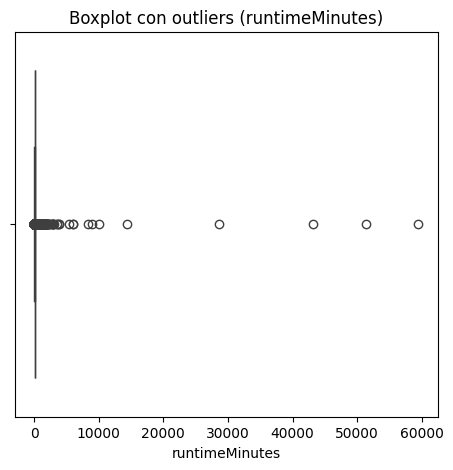

In [62]:
# Gráfico con outliers
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.boxplot(x=df_title_basics_filtrado['runtimeMinutes'])
plt.title('Boxplot con outliers (runtimeMinutes)')

In [63]:
#filtro el boxplot para ver los datos de los outliers
df_title_basics_filtrado[df_title_basics_filtrado['runtimeMinutes'] >= 5000]

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,runtimeMinutes,genres
447960,tt0466521,tvSeries,The Sharing Circle,The Sharing Circle,0,1991-01-01,8400,Documentary
1436251,tt10844900,movie,Qw,Qw,0,2019-01-01,10062,Drama
2227104,tt12277054,movie,Carnets Filmés (Liste Complète),Carnets Filmés (Liste Complète),0,2019-01-01,28643,Documentary
2763225,tt13281484,tvSeries,P3aksjonen,P3aksjonen,0,2009-01-01,6000,Talk-Show
5942008,tt2355497,movie,Beijing 2003,Beijing 2003,0,2004-01-01,9000,Documentary
6307895,tt2659636,movie,Modern Times Forever,Modern Times Forever,0,2011-01-01,14400,Documentary
7049423,tt29302558,movie,100,100,0,2019-01-01,59460,Animation
8112134,tt3854496,movie,Ambiancé,Ambiancé,0,2020-01-01,43200,Documentary
8650291,tt5068890,movie,Hunger!,Hunger!,0,2015-01-01,6000,"Documentary,Drama"
8679921,tt5136218,movie,London EC1,London EC1,0,2015-01-01,5460,"Comedy,Drama,Mystery"


In [64]:
#tratamos los outliers
valor_runtime = df_title_basics_filtrado['runtimeMinutes']

#creamos los quartiles
Q1 = valor_runtime.quantile(.25)
Q3 = valor_runtime.quantile(.75)
IIQ = Q3 - Q1
limite_inferior = Q1 - 1.5 * IIQ
limite_superior = Q3 + 1.5 * IIQ

#criterio de seleccion para los valores
seleccion = ((valor_runtime >= limite_inferior) & (valor_runtime <= limite_superior))

df_title_basics_filtrado = df_title_basics_filtrado[seleccion]


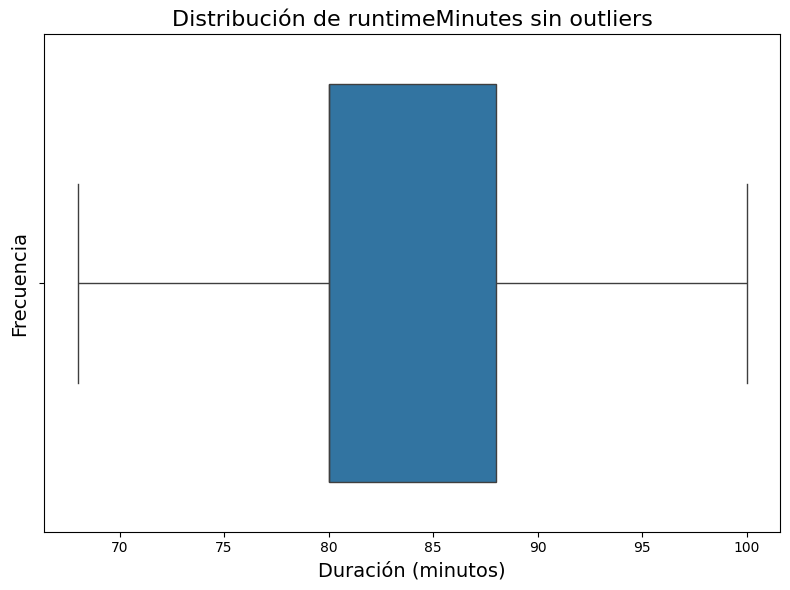

In [65]:
fig, ax = plt.subplots(figsize=(8, 6))

# Graficar el boxplot utilizando seaborn
sns.boxplot(x=df_title_basics_filtrado['runtimeMinutes'], ax=ax, showfliers=False)

# Añadir título y etiquetas de los ejes
ax.set_title('Distribución de runtimeMinutes sin outliers', fontsize=16)
ax.set_xlabel('Duración (minutos)', fontsize=14)
ax.set_ylabel('Frecuencia', fontsize=14)

# Ajustar el espaciado y mostrar el gráfico
plt.tight_layout()
plt.show()

array([[<Axes: title={'center': 'runtimeMinutes'}>]], dtype=object)

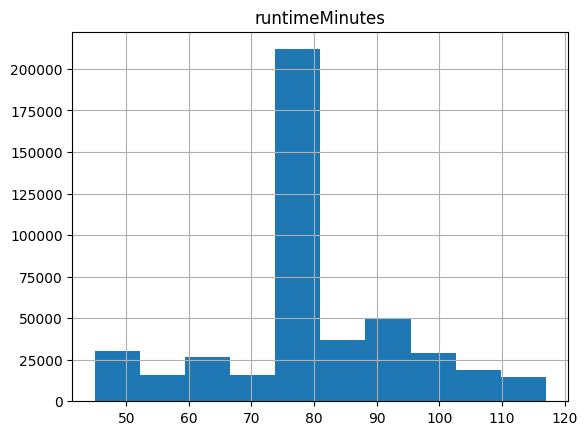

In [66]:
df_title_basics_filtrado.hist(['runtimeMinutes'])

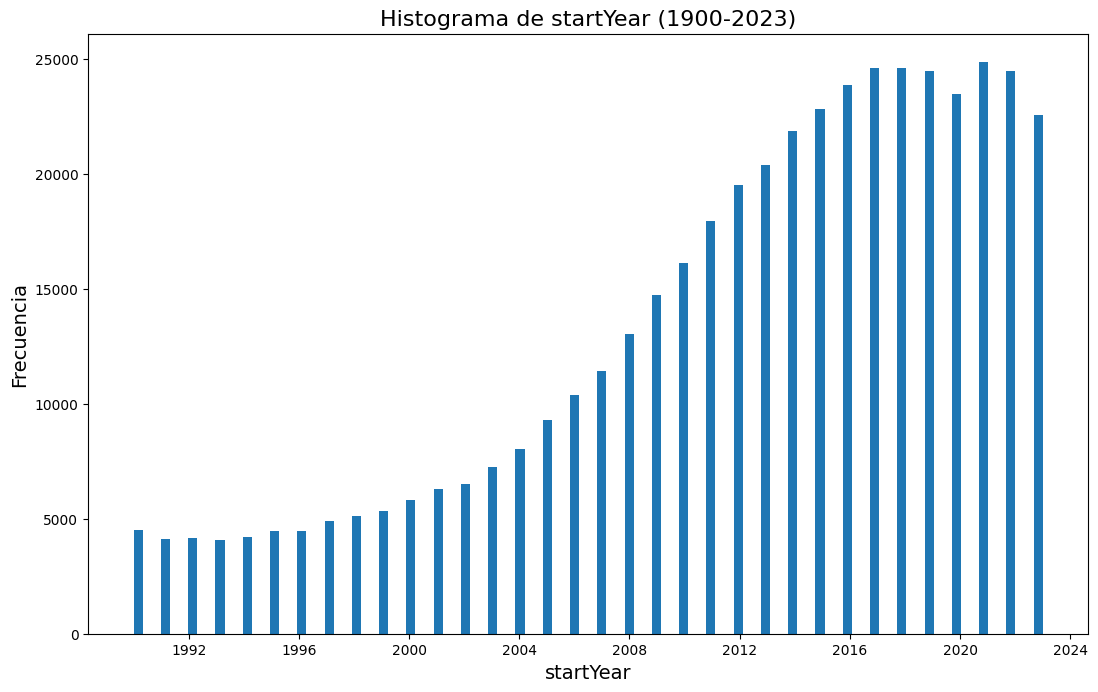

In [67]:
fig = plt.figure(figsize=(10, 6))
eje = fig.add_axes([0,0,1,1])

eje.hist(df_title_basics_filtrado['startYear'], bins=100)
#título y las etiquetas
plt.title('Histograma de startYear (1900-2023)', fontsize=16)
plt.xlabel('startYear', fontsize=14)
plt.ylabel('Frecuencia', fontsize=14)

plt.show()

<ipython-input-68-8867c6c71579>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='isAdult', data=df_title_basics_filtrado, palette=['blue', 'orange'])


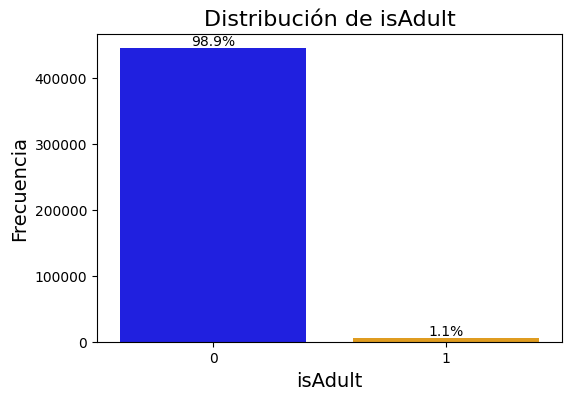

In [68]:
#ahora para la distribución de isAdult

#primero generamos el porcentaje de cada barra
porcentajes = df_title_basics_filtrado['isAdult'].value_counts(normalize=True) * 100

#las barras
plt.figure(figsize=(6, 4))
ax = sns.countplot(x='isAdult', data=df_title_basics_filtrado, palette=['blue', 'orange'])

plt.title('Distribución de isAdult', fontsize=16)
plt.xlabel('isAdult', fontsize=14)
plt.ylabel('Frecuencia', fontsize=14)

# Añadirmos las etiquetas con el porcentaje a las barras
for p in ax.patches:
    porcentaje = '{:.1f}%'.format(100 * p.get_height() / len(df_title_basics_filtrado))
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(porcentaje, (x, y), ha='center', va='center', xytext=(0, 5), textcoords='offset points')


plt.show()

In [69]:
df_title_ratings_filtrado.describe()

,averageRating,numVotes
count,281357.00,281357.00
mean,6.40,3886.78
std,1.50,37675.03
min,1.00,5.00
25%,5.50,18.00
50%,6.60,59.00
75%,7.50,313.00
max,10.00,2904305.00


<Axes: >

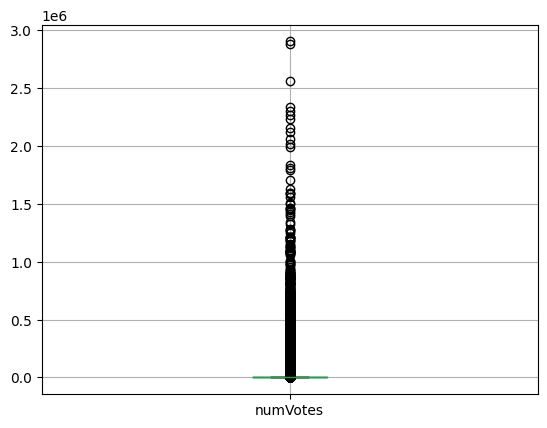

In [70]:
df_title_ratings_filtrado.boxplot(['numVotes'])

In [71]:
df_title_ratings_filtrado[df_title_ratings_filtrado['numVotes'] >=1500000]

,tconst,averageRating,numVotes
76908,tt0102926,8.60,1556510
82682,tt0109830,8.80,2270172
83564,tt0110912,8.90,2232377
83781,tt0111161,9.30,2904305
86343,tt0114369,8.60,1809107
91589,tt0120737,8.90,2017109
91651,tt0120815,8.60,1504167
98281,tt0133093,8.70,2063861
100502,tt0137523,8.80,2337621
116280,tt0167260,9.00,1988679


In [72]:
#tratamos los outliers
valor_numVotes = df_title_ratings_filtrado['numVotes']

#creamos los quartiles
Q1 = valor_numVotes.quantile(.25)
Q3 = valor_numVotes.quantile(.75)
IIQ = Q3 - Q1
limite_inferior = Q1 - 1.5 * IIQ
limite_superior = Q3 + 1.5 * IIQ

#criterio de seleccion para los valores
seleccion = ((valor_numVotes >= limite_inferior) & (valor_numVotes <= limite_superior))

df_title_ratings_filtrado = df_title_ratings_filtrado[seleccion]



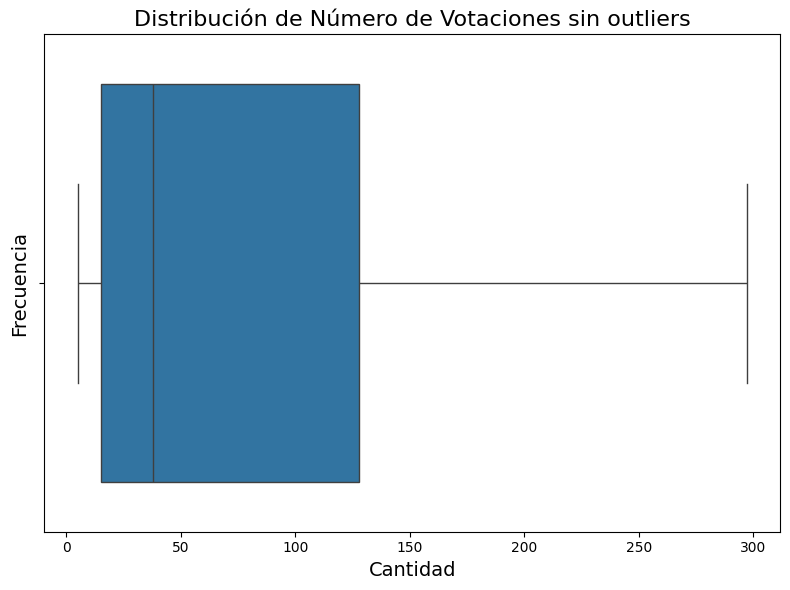

In [73]:
fig, ax = plt.subplots(figsize=(8, 6))

# Graficar el boxplot utilizando seaborn
sns.boxplot(x=df_title_ratings_filtrado['numVotes'], ax=ax, showfliers=False)

# Añadir título y etiquetas de los ejes
ax.set_title('Distribución de Número de Votaciones sin outliers', fontsize=16)
ax.set_xlabel('Cantidad', fontsize=14)
ax.set_ylabel('Frecuencia', fontsize=14)

# Ajustar el espaciado y mostrar el gráfico
plt.tight_layout()
plt.show()

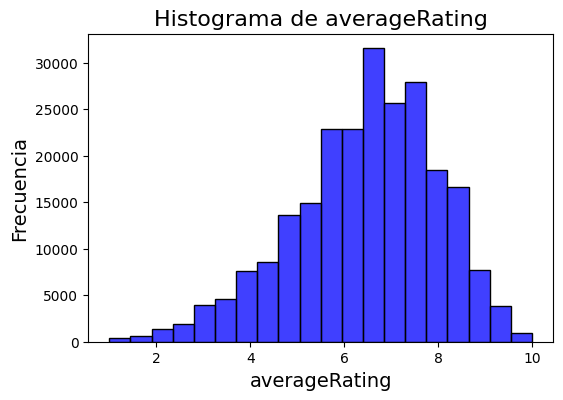

In [74]:
#histograma para averageRating

plt.figure(figsize=(6, 4))
sns.histplot(df_title_ratings_filtrado['averageRating'], bins=20, color='blue', edgecolor='black')
plt.title('Histograma de averageRating', fontsize=16)
plt.xlabel('averageRating', fontsize=14)
plt.ylabel('Frecuencia', fontsize=14)
plt.show()


In [75]:
df_tmdb_filtrado.describe()

,release_date,budget,revenue,vote_average,roi
count,9098,9098.00,9098.00,9098.00,9098.00
mean,2002-02-28 02:06:18.280940928,24898927.34,58422398.10,6.16,1.02
min,1914-04-25 00:00:00,1.00,1.00,0.00,-1.00
25%,1996-01-12 00:00:00,2500000.00,1453317.25,5.74,-0.43
50%,2007-04-13 00:00:00,10000000.00,11000000.00,6.37,0.47
75%,2014-09-06 18:00:00,30000000.00,49742506.00,6.98,1.94
max,2024-07-23 00:00:00,460000000.00,2800000000.00,10.00,7.21
std,NaN,38882019.34,138819997.89,1.60,1.86


<Axes: >

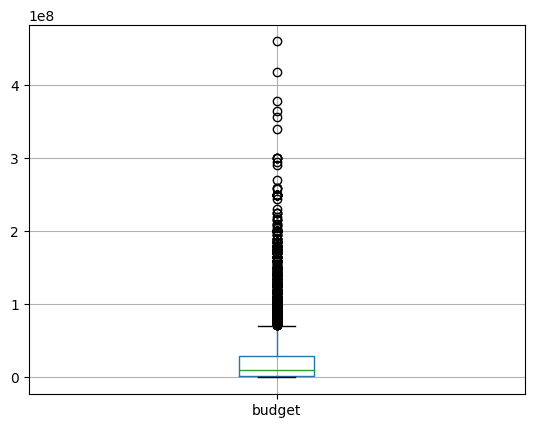

In [76]:
#boxplot del budget o los costos de producción
df_tmdb_filtrado.boxplot(['budget'])

In [77]:
df_tmdb_filtrado[df_tmdb_filtrado['budget'] >= 75000000]

,tconst,release_date,budget,revenue,genres,production_countries,vote_average,roi
0,tt1375666,2010-07-15,160000000,825532764,"Action, Science Fiction, Adventure","United Kingdom, United States of America",8.36,4.16
1,tt0816692,2014-11-05,165000000,701729206,"Adventure, Drama, Science Fiction","United Kingdom, United States of America",8.42,3.25
2,tt0468569,2008-07-16,185000000,1004558444,"Drama, Action, Crime, Thriller","United Kingdom, United States of America",8.51,4.43
4,tt0848228,2012-04-25,220000000,1518815515,"Science Fiction, Action, Adventure",United States of America,7.71,5.90
6,tt4154756,2018-04-25,300000000,2052415039,"Adventure, Action, Science Fiction",United States of America,8.26,5.84
8,tt2015381,2014-07-30,170000000,772776600,"Action, Science Fiction, Adventure",United States of America,7.91,3.55
11,tt0241527,2001-11-16,125000000,976475550,"Adventure, Fantasy","United Kingdom, United States of America",7.92,6.81
12,tt0371746,2008-04-30,140000000,585174222,"Action, Science Fiction, Adventure",United States of America,7.64,3.18
13,tt1853728,2012-12-25,100000000,425368238,"Drama, Western",United States of America,8.17,3.25
15,tt4154796,2019-04-24,356000000,2800000000,"Adventure, Science Fiction, Action",United States of America,8.26,6.87


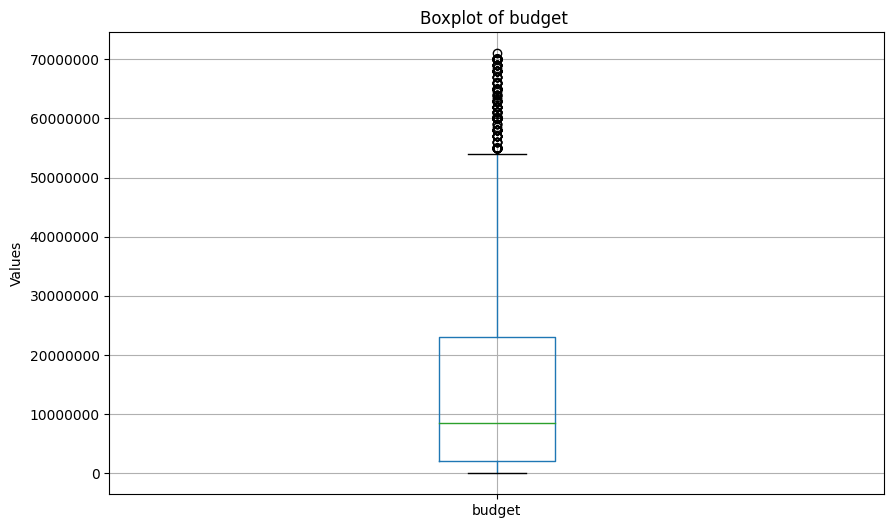

In [78]:
#tratamos los outliers
valor_budget = df_tmdb_filtrado['budget']

#creamos los quartiles
Q1 = valor_budget.quantile(.25)
Q3 = valor_budget.quantile(.75)
IIQ = Q3 - Q1
limite_inferior = Q1 - 1.5 * IIQ
limite_superior = Q3 + 1.5 * IIQ

#criterio de seleccion para los valores
seleccion = ((valor_budget >= limite_inferior) & (valor_budget <= limite_superior))

df_tmdb_filtrado = df_tmdb_filtrado[seleccion]

#verificamos el boxplot
plt.figure(figsize=(10, 6))
df_tmdb_filtrado.boxplot(column=['budget'])

# Configurar los ejes para mostrar valores normales
plt.ticklabel_format(style='plain', axis='y')

# Añadir etiquetas y título
plt.ylabel('Values')
plt.title('Boxplot of budget ')

# Mostrar el gráfico
plt.show()



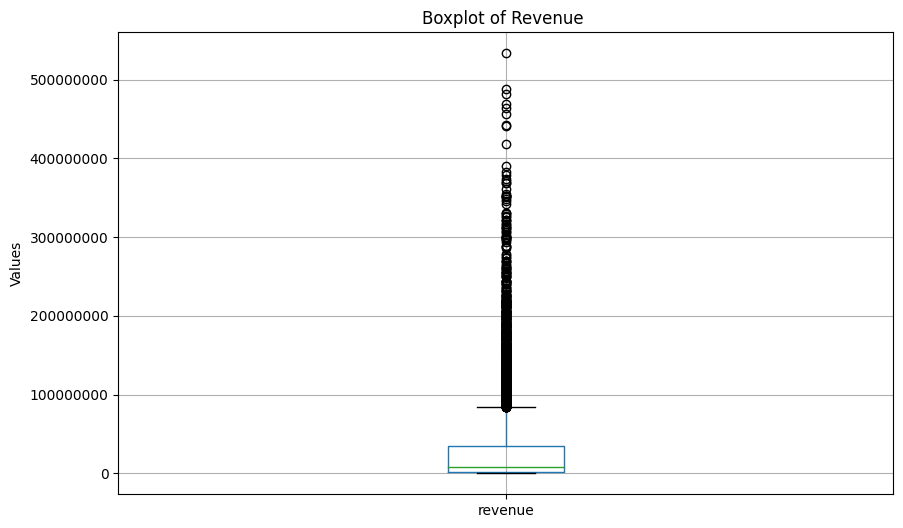

In [79]:
#boxplot de revenue que mide los ingresos generados

plt.figure(figsize=(10, 6))
df_tmdb_filtrado.boxplot(column=['revenue'])

# Configurar los ejes para mostrar valores normales
plt.ticklabel_format(style='plain', axis='y')

# Añadir etiquetas y título

plt.ylabel('Values')
plt.title('Boxplot of Revenue ')

# Mostrar el gráfico
plt.show()

In [80]:
#los outliers mas altos
df_tmdb_filtrado[df_tmdb_filtrado['revenue'] >= 350000000]

,tconst,release_date,budget,revenue,genres,production_countries,vote_average,roi
16,tt0133093,1999-03-30,63000000,463517383,"Action, Science Fiction",United States of America,8.21,6.36
70,tt2267998,2014-10-01,61000000,369330363,"Mystery, Thriller, Drama",United States of America,7.89,5.05
97,tt0126029,2001-05-18,60000000,487853320,"Animation, Comedy, Fantasy, Adventure, Family",United States of America,7.73,7.13
116,tt0120815,1998-07-24,70000000,481840909,"Drama, History, War",United States of America,8.21,5.88
127,tt0264464,2002-12-16,52000000,352114312,"Drama, Crime",United States of America,7.97,5.77
131,tt1323594,2010-07-08,69000000,533679475,"Family, Animation, Comedy",United States of America,7.23,6.73
162,tt0416449,2007-03-07,65000000,456082343,"Action, Adventure, War","Bulgaria, Canada, United States of America",7.17,6.02
176,tt0268380,2002-03-10,59000000,383257136,"Animation, Comedy, Family, Adventure",United States of America,7.35,5.50
323,tt3402236,2017-11-03,55000000,352794081,"Mystery, Drama, Crime","United Kingdom, United States of America",6.71,5.41
449,tt4477536,2018-01-17,55000000,368307760,"Drama, Romance",United States of America,6.71,5.70


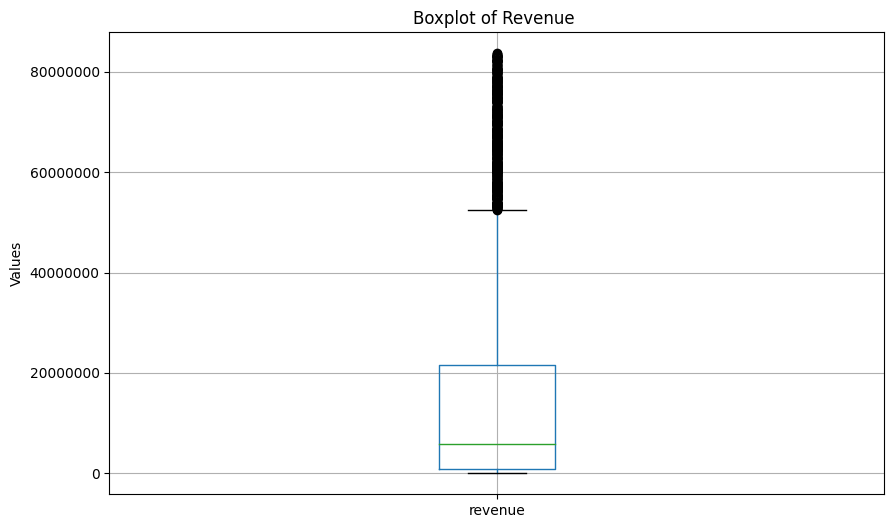

In [81]:
#tratamos los outliers
valor_revenue = df_tmdb_filtrado['revenue']

#creamos los quartiles
Q1 = valor_revenue.quantile(.25)
Q3 = valor_revenue.quantile(.75)
IIQ = Q3 - Q1
limite_inferior = Q1 - 1.5 * IIQ
limite_superior = Q3 + 1.5 * IIQ

#criterio de seleccion para los valores
seleccion = ((valor_revenue >= limite_inferior) & (valor_revenue <= limite_superior))

df_tmdb_filtrado = df_tmdb_filtrado[seleccion]

#verificamos el boxplot
plt.figure(figsize=(10, 6))
df_tmdb_filtrado.boxplot(column=['revenue'])

# Configurar los ejes para mostrar valores normales
plt.ticklabel_format(style='plain', axis='y')

# Añadir etiquetas y título

plt.ylabel('Values')
plt.title('Boxplot of Revenue ')

# Mostrar el gráfico
plt.show()

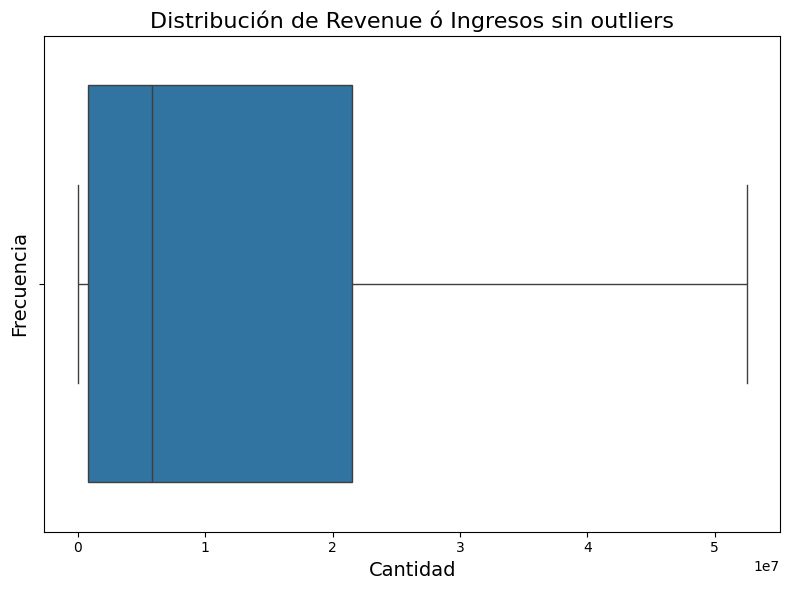

In [82]:
fig, ax = plt.subplots(figsize=(8, 6))

# Graficar el boxplot utilizando seaborn
sns.boxplot(x=df_tmdb_filtrado['revenue'], ax=ax, showfliers=False)

# Añadir título y etiquetas de los ejes
ax.set_title('Distribución de Revenue ó Ingresos sin outliers', fontsize=16)
ax.set_xlabel('Cantidad', fontsize=14)
ax.set_ylabel('Frecuencia', fontsize=14)

# Ajustar el espaciado y mostrar el gráfico
plt.tight_layout()
plt.show()

# 5.Insights

##5.1 ¿Cual es la evolución del rating por tipo de contenido?

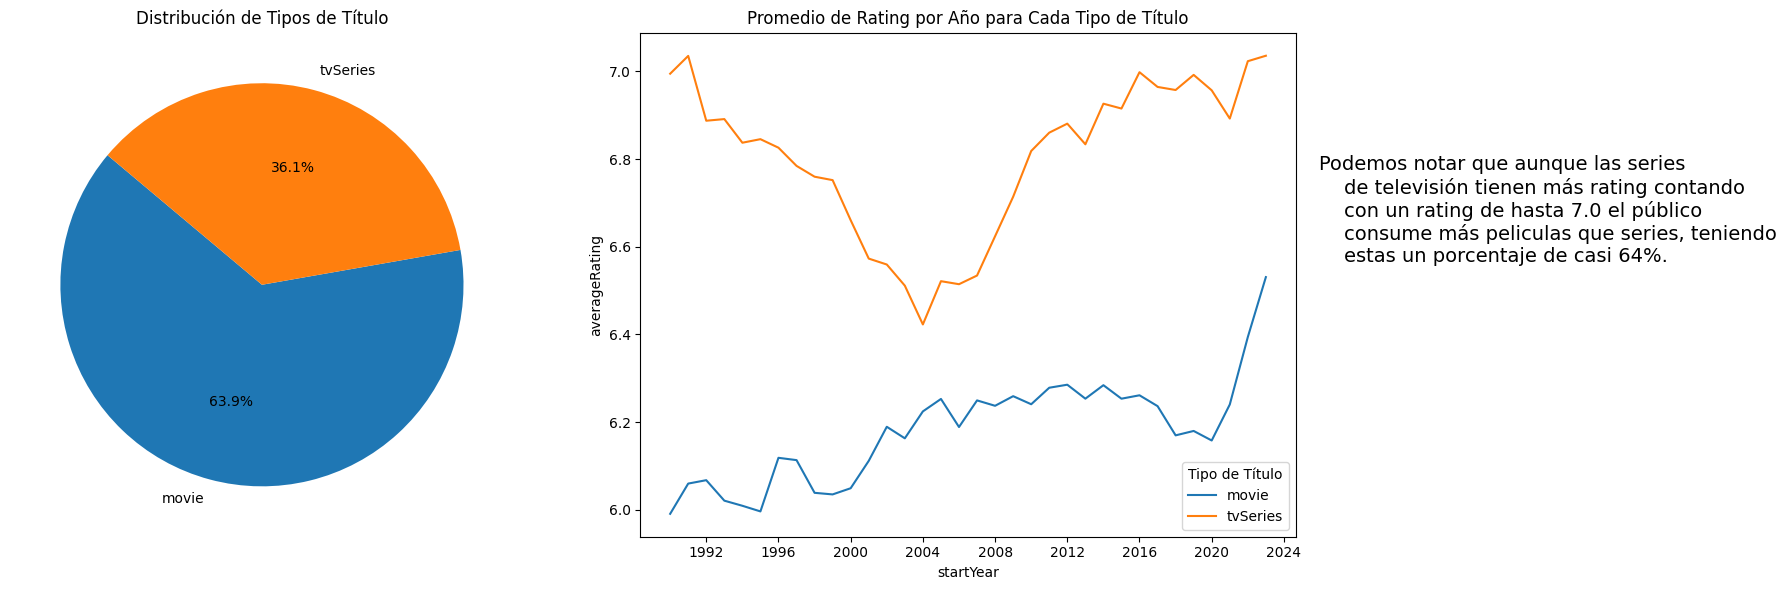

In [83]:
#para el grafico de pizza hacemos un conteo de la columna titleType
# Obtener los tipos de título únicos
title_types = df_title_basics['titleType'].unique()

# Lista para almacenar los DataFrames de promedio de rating por año para cada tipo de título
avg_rating_by_year_list = []

for title_type in title_types:
    # Filtrar df_title_basics por el tipo de título actual
    subset = df_title_basics[df_title_basics['titleType'] == title_type]

    # Merge con df_title_ratings basado en la columna 'tconst'
    merged_subset = subset.merge(df_title_ratings, on='tconst')

    # Calcular el promedio de averageRating agrupado por startYear
    avg_rating_by_year = merged_subset.groupby('startYear')['averageRating'].mean().reset_index()

    # Agregar el tipo de título como una columna para identificación
    avg_rating_by_year['titleType'] = title_type

    # Agregar el DataFrame a la lista
    avg_rating_by_year_list.append(avg_rating_by_year)

# Concatenar todos los resultados en un único DataFrame
avg_rating_by_year_df = pd.concat(avg_rating_by_year_list)
# Contar la frecuencia de cada año en la columna 'startYear'
year_counts = avg_rating_by_year_df['startYear'].value_counts()


# Crear la figura y los subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Gráfico de pizza (Conteo de tipos de título)
title_type_counts = df_title_basics['titleType'].value_counts()
ax1.pie(title_type_counts, labels=title_type_counts.index, autopct='%1.1f%%', startangle=140)
ax1.set_title('Distribución de Tipos de Título')

# Gráfico de líneas (Promedio de rating por año para cada tipo de título)
avg_rating_by_year_list = []

for title_type in title_types:
    subset = df_title_basics[df_title_basics['titleType'] == title_type]
    merged_subset = subset.merge(df_title_ratings, on='tconst')
    avg_rating_by_year = merged_subset.groupby('startYear')['averageRating'].mean().reset_index()
    avg_rating_by_year['titleType'] = title_type
    avg_rating_by_year_list.append(avg_rating_by_year)

avg_rating_by_year_df = pd.concat(avg_rating_by_year_list)

sns.lineplot(x='startYear', y='averageRating', hue='titleType', data=avg_rating_by_year_df, ax=ax2)
ax2.set_title('Promedio de Rating por Año para Cada Tipo de Título')
ax2.legend(title='Tipo de Título')


# Añadir texto al lado de los gráficos
fig.text(
    1,
    0.555,
    r"""Podemos notar que aunque las series
    de televisión tienen más rating contando
    con un rating de hasta 7.0 el público
    consume más peliculas que series, teniendo
    estas un porcentaje de casi 64%.""",
    ha="left",
    fontsize=14,
    )


# Ajustar el diseño y mostrar el gráfico
plt.subplots_adjust(hspace=0.5)
plt.tight_layout()


plt.show()

##5.2 ¿Cual es el rating promedio por género?

In [84]:
#separaremos los generos
df_title_basics_expanded = df_title_basics.assign(genre=df_title_basics['genres'].str.split(',')).explode('genre')
df_title_basics_expanded.head()
#agrupamos con df_title_ratings

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,runtimeMinutes,genres,genre
11634,tt0011801,movie,Tötet nicht mehr,Tötet nicht mehr,0,2019-01-01,80,"Action,Crime",Action
11634,tt0011801,movie,Tötet nicht mehr,Tötet nicht mehr,0,2019-01-01,80,"Action,Crime",Crime
13079,tt0013274,movie,Istoriya grazhdanskoy voyny,Istoriya grazhdanskoy voyny,0,2021-01-01,94,Documentary,Documentary
15482,tt0015724,movie,Dama de noche,Dama de noche,0,1993-01-01,102,"Drama,Mystery,Romance",Drama
15482,tt0015724,movie,Dama de noche,Dama de noche,0,1993-01-01,102,"Drama,Mystery,Romance",Mystery


In [85]:
#verificando si existen nulos en runtimeMinutes
print(df_title_basics_expanded['runtimeMinutes'].isnull().any())

False


In [86]:
#merge en title y rating
df_merged=df_title_basics_expanded.merge(df_title_ratings,on='tconst')
df_merged.head()

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,runtimeMinutes,genres,genre,averageRating,numVotes
0,tt0013274,movie,Istoriya grazhdanskoy voyny,Istoriya grazhdanskoy voyny,0,2021-01-01,94,Documentary,Documentary,6.60,71
1,tt0015724,movie,Dama de noche,Dama de noche,0,1993-01-01,102,"Drama,Mystery,Romance",Drama,6.50,30
2,tt0015724,movie,Dama de noche,Dama de noche,0,1993-01-01,102,"Drama,Mystery,Romance",Mystery,6.50,30
3,tt0015724,movie,Dama de noche,Dama de noche,0,1993-01-01,102,"Drama,Mystery,Romance",Romance,6.50,30
4,tt0035423,movie,Kate & Leopold,Kate & Leopold,0,2001-01-01,118,"Comedy,Fantasy,Romance",Comedy,6.40,89286


In [87]:
df_genre_stats = df_merged.groupby('genre').agg(
    avg_rating=('averageRating', 'mean'), movie_count=('tconst', 'count')).reset_index()
df_genre_stats.head()

,genre,avg_rating,movie_count
0,Action,5.95,26769
1,Adult,5.85,1431
2,Adventure,6.34,14930
3,Animation,6.74,12584
4,Biography,7.05,8848


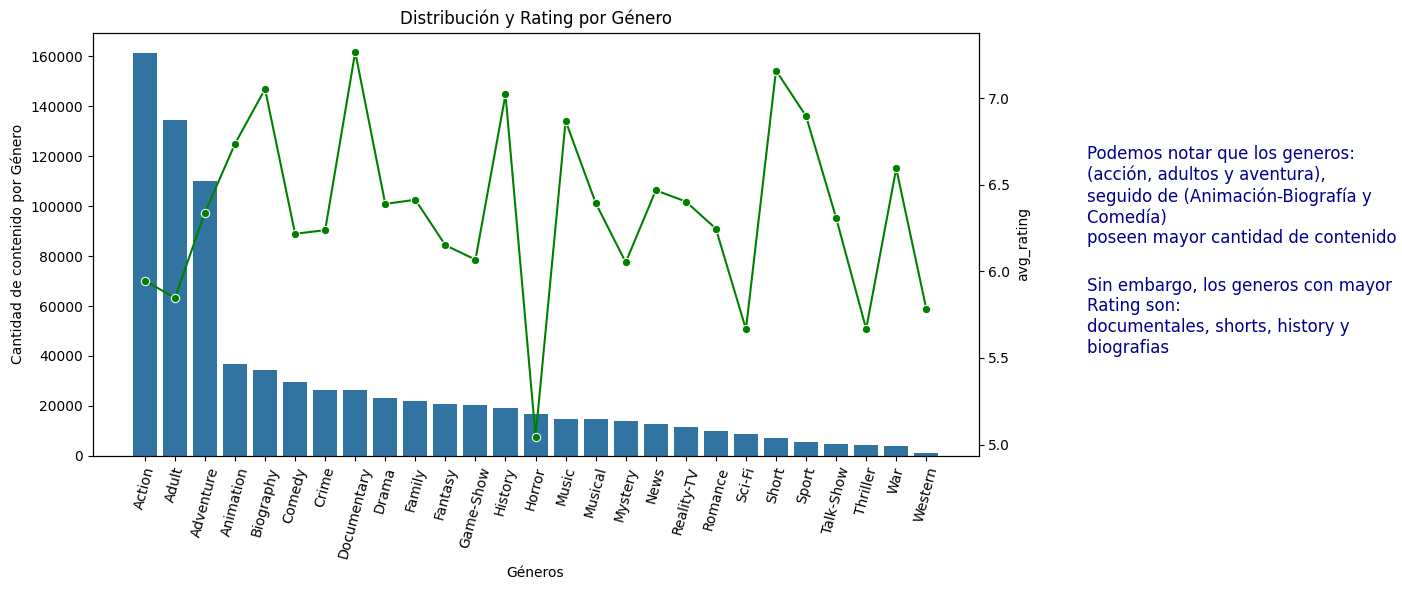

In [88]:
#Visualización
fig, ax1 = plt.subplots(figsize=(14, 6))

# Grafico de barras
sns.countplot(data=df_title_basics_expanded, x='genre', ax=ax1, order=df_title_basics_expanded['genre'].value_counts().index)
# Gráfico de barras
#sns.countplot(data=df_title_basics_expanded, x='genre', ax=ax1, order=genre_order, palette=colors)
ax1.set_title('Distribución y Rating por Género')
ax1.set_xlabel('Géneros')
ax1.set_ylabel('Cantidad de contenido por Género')
ax1.tick_params(axis='x', rotation=75)
# Crear un segundo eje y graficar el rating promedio
ax2 = ax1.twinx()
sns.lineplot(data=df_genre_stats, x='genre', y='avg_rating', ax=ax2, color='g', marker='o')

# Anotación
p1 = "Podemos notar que los generos: \n(acción, adultos y aventura), \nseguido de (Animación-Biografía y Comedía) \nposeen mayor cantidad de contenido"
p2 = "\n\nSin embargo, los generos con mayor Rating son: \ndocumentales, shorts, history y biografias "

    # Posicionar los párrafos a la derecha de la gráfica
fig.text(0.78, 0.75, p1, ha='left', va='top', fontsize=12, wrap=True, color="darkblue")
fig.text(0.78, 0.60, p2, ha='left', va='top', fontsize=12, wrap=True, color="darkblue")

fig.tight_layout(rect=[0, 0, 0.75, 1])  # Ajustar layout para dejar espacio a la derecha

##5.3: ¿Cuáles son los géneros que proporcionan mayor ROI?

In [89]:
def pregunta3():
  global df_title_basics,df_title_ratings,df_tmdb

df_tmdb_expanded = df_tmdb.assign(genre=df_tmdb['genres'].str.split(',').explode('genre').str.strip()).explode('genre')
df_tmdb_expanded.head()

,imdb_id,release_date,budget,revenue,genres,production_countries,vote_average,roi,genre
0,tt1375666,2010-07-15,160000000,825532764,"Action, Science Fiction, Adventure","United Kingdom, United States of America",8.36,4.16,Action
1,tt0816692,2014-11-05,165000000,701729206,"Adventure, Drama, Science Fiction","United Kingdom, United States of America",8.42,3.25,Science Fiction
2,tt0468569,2008-07-16,185000000,1004558444,"Drama, Action, Crime, Thriller","United Kingdom, United States of America",8.51,4.43,Adventure
4,tt0848228,2012-04-25,220000000,1518815515,"Science Fiction, Action, Adventure",United States of America,7.71,5.90,Drama
6,tt4154756,2018-04-25,300000000,2052415039,"Adventure, Action, Science Fiction",United States of America,8.26,5.84,Drama


In [90]:
df_genre_roi = df_tmdb_expanded.groupby('genre')['roi'].mean().sort_values(ascending=False).head(10)
df_genre_roi

genre
Science Fiction   1.54
Fantasy           1.49
Adventure         1.46
Action            1.34
Animation         1.25
Thriller          1.20
Crime             1.15
Drama             1.11
Western           1.07
Family            1.05
Name: roi, dtype: float64

<ipython-input-91-5f289b1616bc>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df_genre_roi.values, y=df_genre_roi.index, palette='viridis', ax=ax)


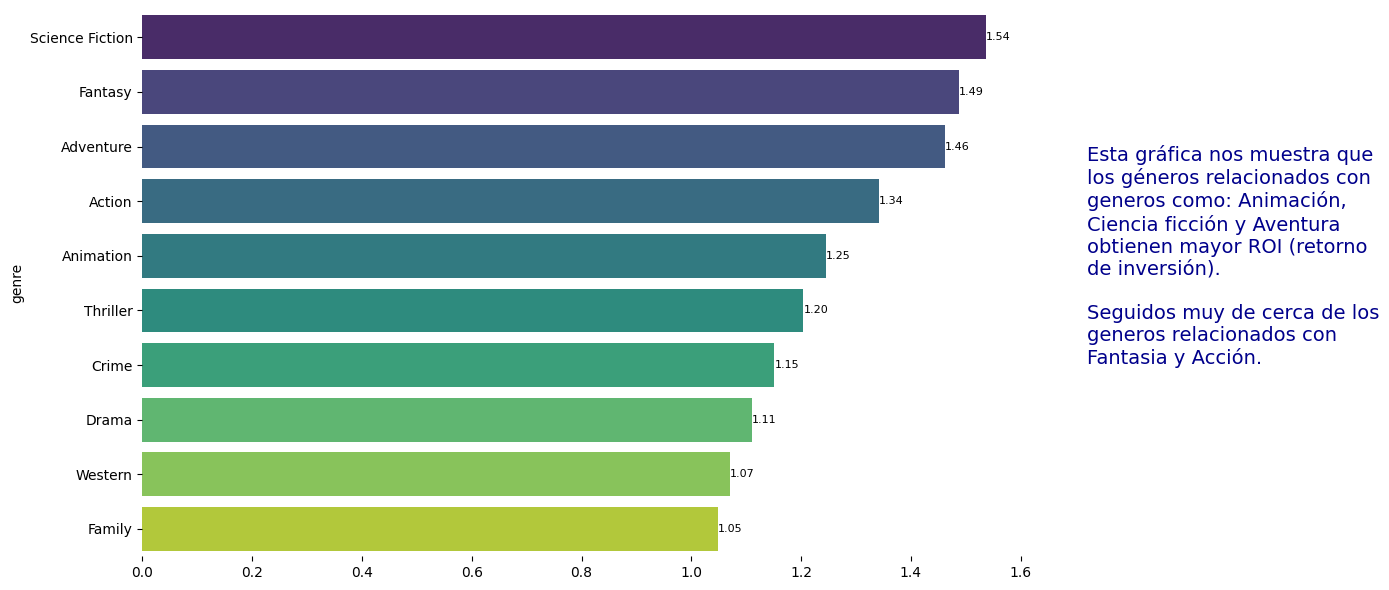

In [91]:
#Visualización
# Crear el gráfico de barras verticales
fig, ax = plt.subplots(figsize=(14, 6))
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
for i, value in enumerate(df_genre_roi.values):
        ax.text(value, i, f'{value:.2f}', va='center', ha='left', fontsize=8, color='black')

# Grafico de barras
sns.barplot(x=df_genre_roi.values, y=df_genre_roi.index, palette='viridis', ax=ax)

# Posicionar el párrafo a la derecha de la gráfica
parrafo = ("Esta gráfica nos muestra que los géneros relacionados con generos como: "
         "Animación, Ciencia ficción y Aventura obtienen mayor ROI (retorno de inversión). "
         "\n\nSeguidos muy de cerca de los generos relacionados con Fantasia y Acción.")

fig.text(0.78, 0.75, parrafo, ha='left', va='top', fontsize=14, wrap=True, color="darkblue")
fig.tight_layout(rect=[0, 0, 0.75, 1])  # Ajustar layout para dejar espacio a la derecha

##5.4: ¿Cuáles son los países con mayor producción de contenido?

In [98]:
def pregunta4():
  global df_title_basics,df_title_ratings,df_tmdb

  '''Separamos los países de producción en la columna production_countries usando str.split(',').
  Usamos explode para convertir las listas de países en filas separadas.
  Eliminamos espacios en blanco de los nombres de los países usando str.strip().'''
  df_tmdb_exploded_countries = df_tmdb.assign(production_countries=df_tmdb['production_countries'].str.split(',')).explode('production_countries').copy()
  df_tmdb_exploded_countries['production_countries'] = df_tmdb_exploded_countries['production_countries'].str.strip()

  # Cambiar el nombre 'United States of America' a 'USA'
  df_tmdb_exploded_countries.loc[df_tmdb_exploded_countries['production_countries'] == 'United States of America', 'production_countries'] = 'USA'

  # Creamos un DataFrame con los datos necesarios para el gráfico
  #Agrupamos por production_countries y calculamos el promedio de roi y el conteo de películas (count).
  df_plot = df_tmdb_exploded_countries.groupby('production_countries').agg({'roi': 'mean', 'production_countries': 'count'})
  df_plot.rename(columns={'production_countries': 'count'}, inplace=True)

  '''Ordenamos el DataFrame df_plot por el conteo de películas (count) y seleccionamos los 15
   países con más producciones.'''
  df_plot = df_plot.sort_values(by=["count"])
  df_plot = df_plot.iloc[-13:]

  #Para crear la visualización de burbujas primero podemos crear posiciones fijas para cada una de las
  #burbujas en la cuadricula
  '''Calculamos num_countries como la cantidad de países en el DataFrame df_plot.
   Calculamos grid_size como el tamaño de la cuadrícula que puede contener estos países (sqrt(num_countries) redondeado hacia arriba).
   Creamos la columna x usando np.tile para repetir una secuencia de números hasta llenar la cuadrícula.
   Creamos la columna y usando np.repeat para repetir cada número de la secuencia el número necesario de veces para llenar la cuadrícula.'''
  num_countries = len(df_plot)
  grid_size = int(np.ceil(np.sqrt(num_countries)))
  df_plot["x"] = np.tile(np.arange(grid_size), grid_size)[:num_countries]
  df_plot["y"] = np.repeat(np.arange(grid_size), grid_size)[:num_countries]

  return df_plot


In [99]:
df_plot = pregunta4()
df_plot

,roi,count,x,y
production_countries,,,,
Belgium,0.08,139,0,0
Australia,0.77,172,1,0
China,0.87,206,2,0
Russia,0.56,216,3,0
Italy,0.25,219,0,1
Spain,0.52,222,1,1
Japan,1.08,228,2,1
Canada,0.69,453,3,1
Germany,0.59,509,0,2


In [94]:
import plotly.express as px
import math

# Ordenamos y seleccionamos los 15 países con más producciones
df_plot = df_plot.sort_values(by=["count"], ascending=False).head(15)

# Calcular la posición de las burbujas en una cuadrícula
num_countries = len(df_plot)
cols = 5  # Número de columnas en la cuadrícula
rows = int(math.ceil(num_countries / cols))
df_plot["x"] = df_plot.index.map(lambda x: (df_plot.index.tolist().index(x)) % cols)
df_plot["y"] = df_plot.index.map(lambda x: (df_plot.index.tolist().index(x)) // cols)

# Crear el gráfico de burbujas
fig = px.scatter(df_plot, x='x', y='y',
                  size='count', color='roi',
                                    color_continuous_scale='Blues',
                  size_max=80)

# Agregar anotaciones para mostrar los nombres de los países
for i, country in enumerate(df_plot.index):
    if country == 'United States of America':
        text = 'USA'
    else:
        text = country
    fig.add_annotation(
        x=df_plot.loc[country, 'x'],
        y=df_plot.loc[country, 'y'],
        text=text,
        showarrow=False,
        font=dict(size=10)
    )

# Ajustar el tamaño del gráfico
fig.update_layout(
    height=600,  # Altura en píxeles
    width=800,   # Anchura en píxeles
)

# Ajustar diseño y mostrar el gráfico
fig.update_traces(textposition='top center')
fig.update_layout(title='<b>ROI Promedio por País de Producción</b>',
                  title_x=0.5,  # Centrar el título
                  xaxis_title=None,
                  yaxis_title=None,
                  xaxis_showticklabels=False,
                  yaxis_showticklabels=False,
                  xaxis_showgrid=False,
                  yaxis_showgrid=False,
                  xaxis_range=[-0.5, cols-0.5],
                  yaxis_range=[-0.5, rows-0.5],
                  yaxis=dict(autorange='reversed'),
                  margin=dict(l=50, r=50, t=80, b=50))

fig.show()

##5.6. Top 5 Series / Movies

In [95]:
# Filtrar las películas y series de df_title_basics
df_movies = df_title_basics[df_title_basics['titleType'] == 'movie']
df_series = df_title_basics[df_title_basics['titleType'] == 'tvSeries']

# Unir con df_title_ratings para obtener numVotes (asumiendo que 'tconst' es la columna clave para unir)
df_movies = df_movies.merge(df_title_ratings, on='tconst', how='left')
df_series = df_series.merge(df_title_ratings, on='tconst', how='left')

# Unir con df_tmdb para obtener más información si es necesario (asumiendo que 'imdb_id' es la columna clave para unir)
df_movies = df_movies.merge(df_tmdb, left_on='tconst', right_on='imdb_id', how='left')
df_series = df_series.merge(df_tmdb, left_on='tconst', right_on='imdb_id', how='left')

# Obtener los top 5 de películas y series más vistas
top_movies = df_movies.sort_values(by='numVotes', ascending=False).head(5)
top_series = df_series.sort_values(by='numVotes', ascending=False).head(5)

# Mostrar los resultados
print("Top 5 Películas Más Vistas:")
print(top_movies[['primaryTitle', 'numVotes']])

print("\nTop 5 Series Más Vistas:")
print(top_series[['primaryTitle', 'numVotes']])

Top 5 Películas Más Vistas:
                    primaryTitle   numVotes
6714    The Shawshank Redemption 2904305.00
49276            The Dark Knight 2885458.00
111488                 Inception 2564018.00
13229                 Fight Club 2337621.00
5967                Forrest Gump 2270172.00

Top 5 Series Más Vistas:
            primaryTitle   numVotes
22056    Game of Thrones 2299809.00
21391       Breaking Bad 2155242.00
148204   Stranger Things 1348147.00
821              Friends 1093979.00
69901   The Walking Dead 1088557.00


In [96]:
!pip install adjustText
#instalamos adjusttext para q nos ayude a evitar q se sobrepongan las etiquetas

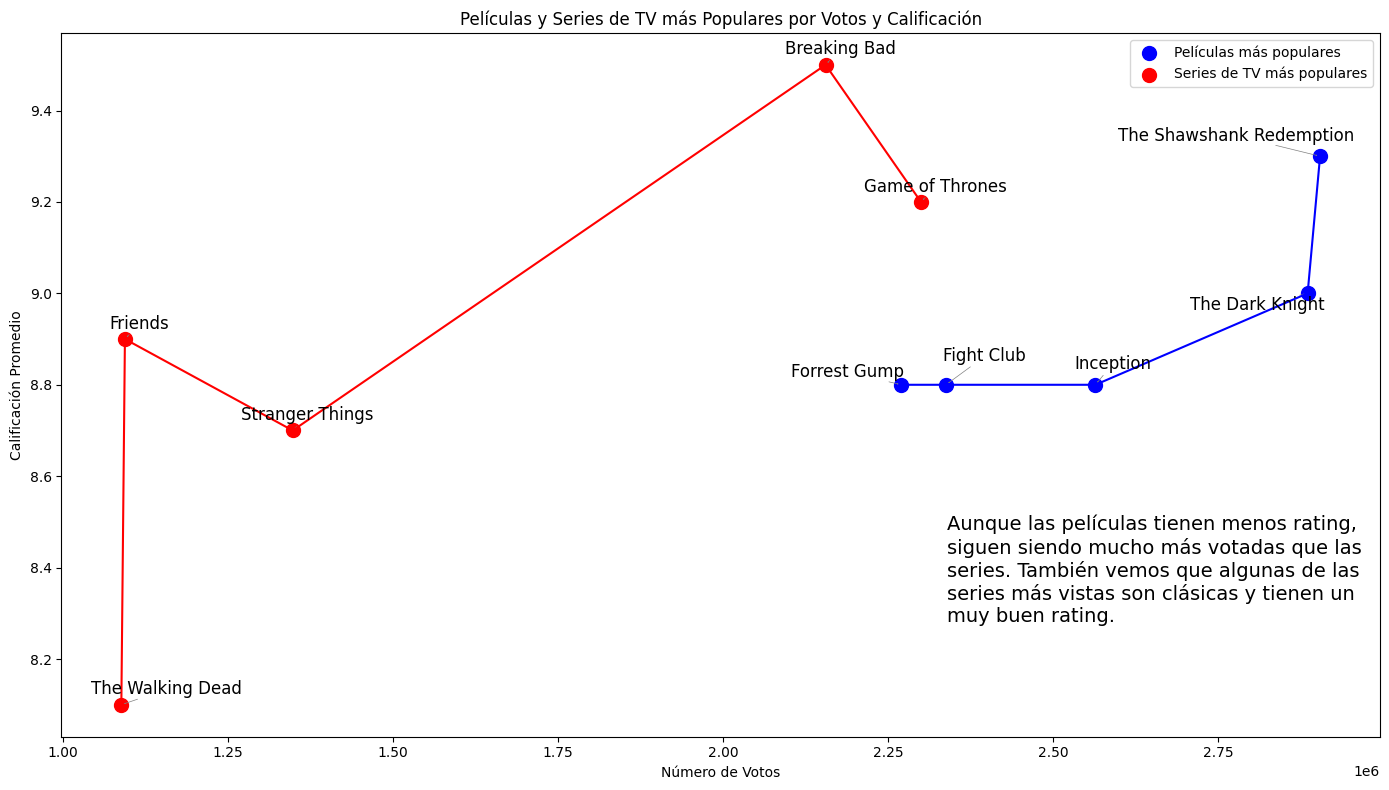

In [97]:
from adjustText import adjust_text
# Graficar las películas principales
plt.figure(figsize=(14, 8))
plt.scatter(top_movies['numVotes'], top_movies['averageRating'], s=100, c='blue', label='Películas más populares')

# Graficar las series principales
plt.scatter(top_series['numVotes'], top_series['averageRating'], s=100, c='red', label='Series de TV más populares')

# Agregar líneas de tendencia (regresión lineal)
sns.lineplot(x='numVotes', y='averageRating', data=top_movies,  color='blue', label='_nolegend_')
sns.lineplot(x='numVotes', y='averageRating', data=top_series,  color='red', label='_nolegend_')

# Texto que quieres añadir al gráfico
parrafo = ("Aunque las películas tienen menos rating, siguen siendo mucho más votadas que las series. "
           "También vemos que algunas de las series más vistas son clásicas y tienen un muy buen rating.")

# Añadir el texto al gráfico
plt.figtext(0.68, 0.35, parrafo, ha='left', va='top', fontsize=14, wrap=True, color="black")


# Agregar etiquetas y título
plt.title('Películas y Series de TV más Populares por Votos y Calificación')
plt.xlabel('Número de Votos')
plt.ylabel('Calificación Promedio')
plt.legend()


# Lista para almacenar las etiquetas
texts = []
for index, row in top_movies.iterrows():
    texts.append(plt.text(row['numVotes'], row['averageRating'], row['primaryTitle'], fontsize=12, ha='center', va='bottom', color='blue'))
for index, row in top_series.iterrows():
    texts.append(plt.text(row['numVotes'], row['averageRating'], row['primaryTitle'], fontsize=12, ha='center', va='bottom', color='red'))

# Ajustar las etiquetas para evitar superposiciones
adjust_text(texts, arrowprops=dict(arrowstyle="->", color='gray', lw=0.5, ))

# Cambiar el color de las etiquetas a negro para q no sea ni rojo ni azul y se vea mejor
for text in texts:
    text.set_color('black')

# Mostramos el gráfico
plt.grid(False)
plt.tight_layout()
plt.show()